In [19]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from rasterio.plot import show
from shapely.geometry import box

def plot_band(tif_path, band_index=1):
    # Open the TIFF file
    with rasterio.open(tif_path) as src:
        # Read the specified band
        band = src.read(band_index)
        
        # Get the transformation and metadata
        transform = src.transform
        crs = src.crs
        bounds = src.bounds

        # Create a matplotlib figure and axis
        fig, ax = plt.subplots(figsize=(12, 12))
        
        # Plot the band data
        show(band, transform=transform, ax=ax, cmap='YlOrRd', title=f'Band {band_index} Visualization')
        
        # Add a colorbar
        cbar = plt.colorbar(cax, ax=ax, orientation='vertical', pad=0.02)
        cbar.set_label('Intensity')
        
        # Add extent box
        rect = box(*bounds)
        geo_df = gpd.GeoDataFrame({'geometry': [rect]}, crs=crs)
        geo_df.boundary.plot(ax=ax, edgecolor='red', linewidth=2, linestyle='--')
        
        # Set labels and title
        ax.set_xlabel('Longitude', fontsize=14, fontweight='bold', family='serif', fontname='Times New Roman')
        ax.set_ylabel('Latitude', fontsize=14, fontweight='bold', family='serif', fontname='Times New Roman')
        ax.set_title(f'Land Surface Temperature of Ghazipur LandFill 18th April, 2024', fontsize=16, fontweight='bold', family='serif', fontname='Times New Roman')
        
        
        # Show the plot
        plt.show()

# Path to the TIFF file



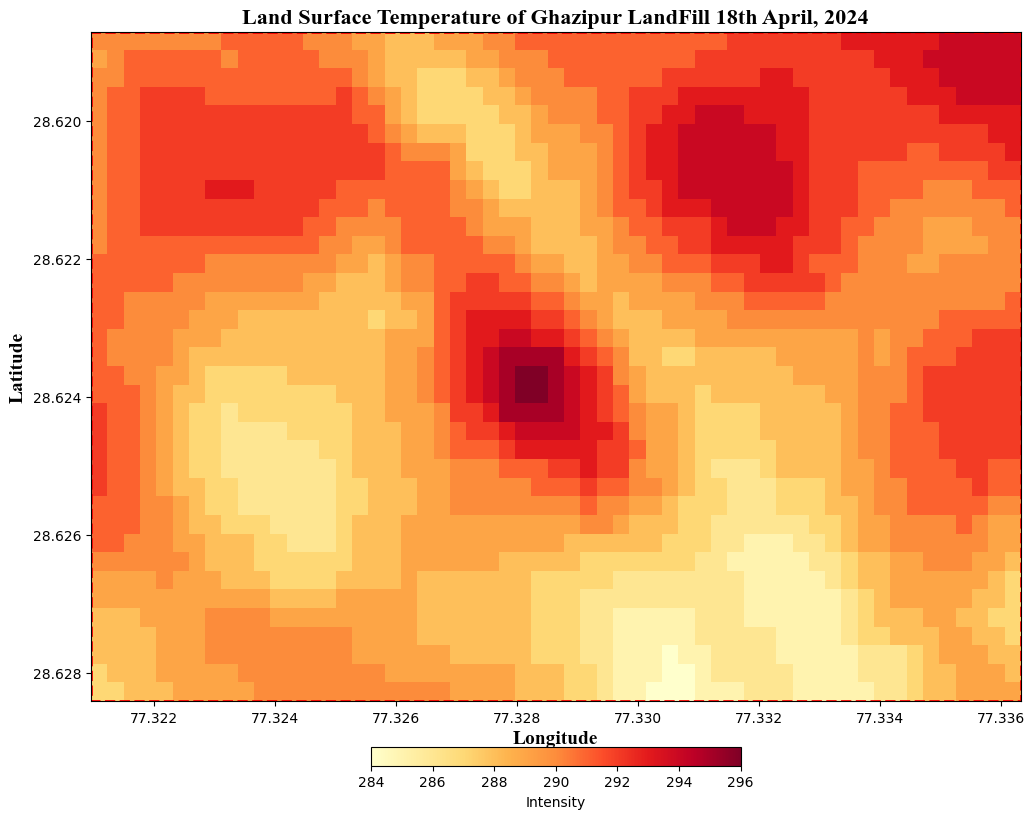

In [29]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.ticker import FuncFormatter
from shapely.geometry import box
import geopandas as gpd

def plot_band(tif_path, band_index=1):
    # Open the TIFF file
    with rasterio.open(tif_path) as src:
        # Read the specified band
        band = src.read(band_index)
        
        # Get the transformation and metadata
        transform = src.transform
        crs = src.crs
        bounds = src.bounds

        # Create a matplotlib figure and axis
        fig, ax = plt.subplots(figsize=(12, 12))
        
        # Plot the band data using imshow
        cax = ax.imshow(band, cmap='YlOrRd', interpolation='none', norm=Normalize(vmin=np.min(band), vmax=np.max(band)),
                        extent=[bounds.left, bounds.right, bounds.bottom, bounds.top])
        
        # Add a horizontal colorbar
        cbar = plt.colorbar(cax, ax=ax, orientation='horizontal', pad=0.05, fraction=0.02)
        cbar.set_label('Intensity')
        
        # Add extent box using GeoDataFrame
        rect = box(*bounds)
        geo_df = gpd.GeoDataFrame({'geometry': [rect]}, crs=crs)
        geo_df.boundary.plot(ax=ax, edgecolor='red', linewidth=2, linestyle='--')
        
        # Set labels and title
        ax.set_xlabel('Longitude', fontsize=14, fontweight='bold', family='serif', fontname='Times New Roman')
        ax.set_ylabel('Latitude', fontsize=14, fontweight='bold', family='serif', fontname='Times New Roman')
        ax.set_title('Land Surface Temperature of Ghazipur LandFill 18th April, 2024', fontsize=16, fontweight='bold', family='serif', fontname='Times New Roman')
        
        # Invert the y-axis to match image coordinates
        ax.invert_yaxis()

        # Define a formatter function for three decimal places
        def format_func(value, tick_number):
            return f'{value:.3f}'  # Display with 3 decimal places
        
        # Apply the formatter to both axes
        ax.xaxis.set_major_formatter(FuncFormatter(format_func))
        ax.yaxis.set_major_formatter(FuncFormatter(format_func))
        
        # Show the plot
        plt.show()

# Path to the TIFF file
tif_path = '/Users/jayarajupakki/Downloads/Landsat2024_Delhi.tif'

# Plot the first band
plot_band(tif_path, band_index=1)


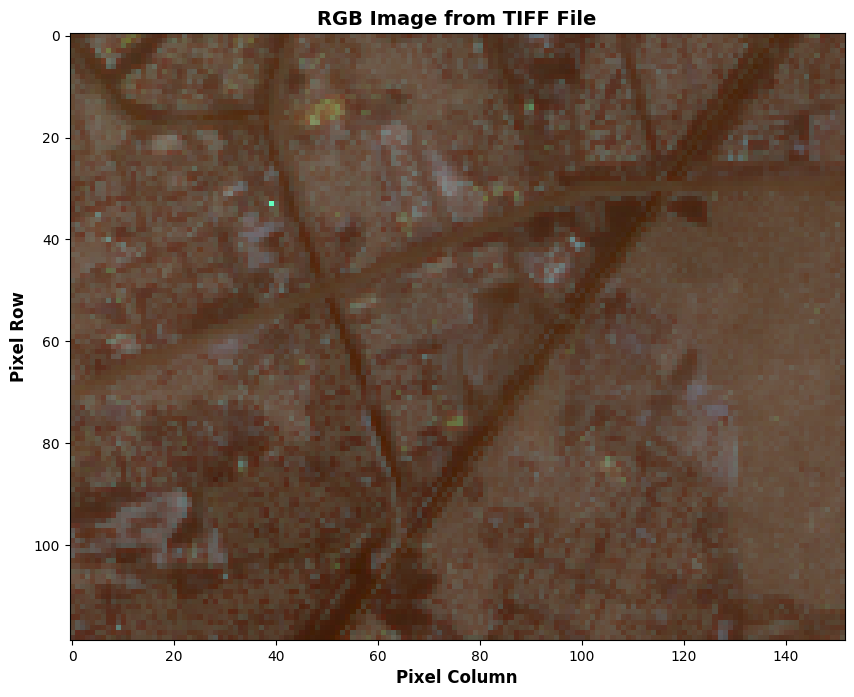

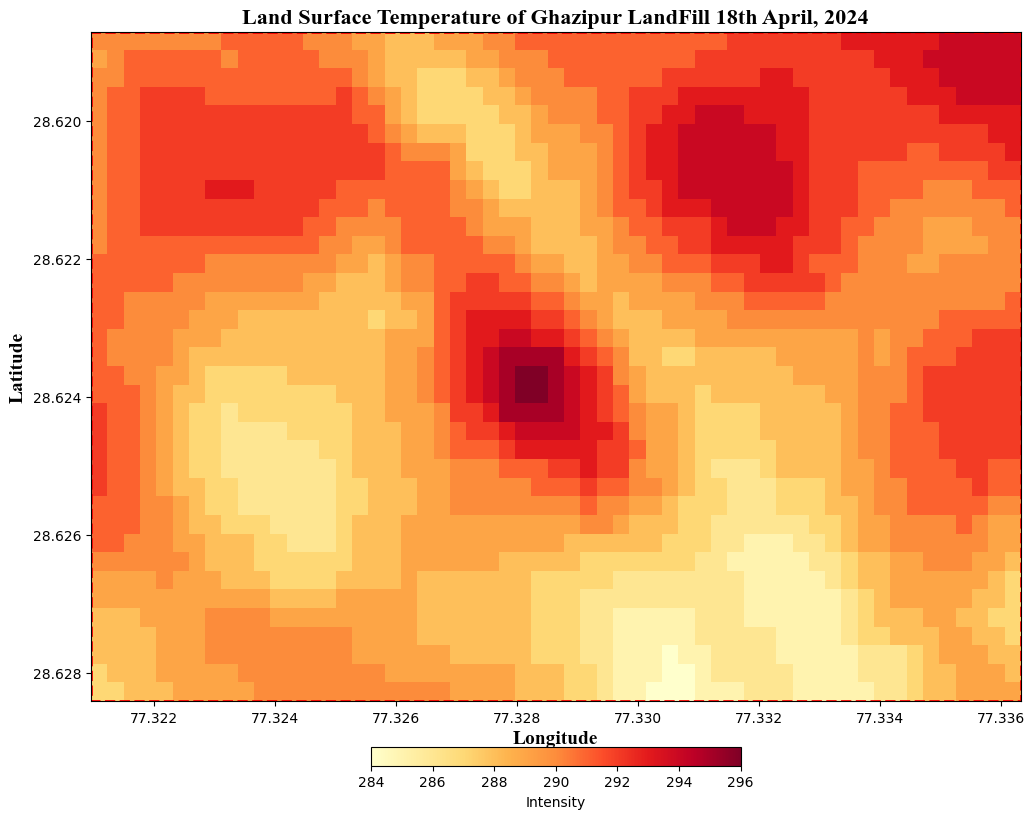

In [8]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.ticker import FuncFormatter
from shapely.geometry import box
import geopandas as gpd

def plot_rgb_tiff(tif_path):
    # Open the TIFF file
    with rasterio.open(tif_path) as src:
        # Read the RGB bands (assuming they are stored in bands 1, 2, and 3)
        red = src.read(1)
        green = src.read(2)
        blue = src.read(3)
        
        # Stack the bands to create an RGB image
        rgb = np.stack([red, green, blue], axis=-1)

        # Normalize the RGB values to the range 0-1 for visualization
        rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min())

        # Create a matplotlib figure and axis
        fig, ax = plt.subplots(figsize=(10, 10))
        
        # Plot the RGB image
        ax.imshow(rgb)
        
        # Set labels and title
        ax.set_xlabel('Pixel Column', fontsize=12, fontweight='bold')
        ax.set_ylabel('Pixel Row', fontsize=12, fontweight='bold')
        ax.set_title('RGB Image from TIFF File', fontsize=14, fontweight='bold')
        
        # Show the plot
        plt.show()

def plot_band(tif_path, band_index=1):
    # Open the TIFF file
    with rasterio.open(tif_path) as src:
        # Read the specified band
        band = src.read(band_index)
        
        # Get the transformation and metadata
        transform = src.transform
        crs = src.crs
        bounds = src.bounds

        # Create a matplotlib figure and axis
        fig, ax = plt.subplots(figsize=(12, 12))
        
        # Plot the band data using imshow
        cax = ax.imshow(band, cmap='YlOrRd', interpolation='none', 
                        norm=Normalize(vmin=np.min(band), vmax=np.max(band)),
                        extent=[bounds.left, bounds.right, bounds.bottom, bounds.top])
        
        # Add a horizontal colorbar
        cbar = plt.colorbar(cax, ax=ax, orientation='horizontal', pad=0.05, fraction=0.02)
        cbar.set_label('Intensity')
        
        # Add extent box using GeoDataFrame
        rect = box(*bounds)
        geo_df = gpd.GeoDataFrame({'geometry': [rect]}, crs=crs)
        geo_df.boundary.plot(ax=ax, edgecolor='red', linewidth=2, linestyle='--')
        
        # Set labels and title
        ax.set_xlabel('Longitude', fontsize=14, fontweight='bold', family='serif', fontname='Times New Roman')
        ax.set_ylabel('Latitude', fontsize=14, fontweight='bold', family='serif', fontname='Times New Roman')
        ax.set_title('Land Surface Temperature of Ghazipur LandFill 18th April, 2024', fontsize=16, fontweight='bold', family='serif', fontname='Times New Roman')
        
        # Invert the y-axis to match image coordinates
        ax.invert_yaxis()

        # Define a formatter function for three decimal places
        def format_func(value, tick_number):
            return f'{value:.3f}'  # Display with 3 decimal places
        
        # Apply the formatter to both axes
        ax.xaxis.set_major_formatter(FuncFormatter(format_func))
        ax.yaxis.set_major_formatter(FuncFormatter(format_func))
        
        # Show the plot
        plt.show()

# Path to the RGB TIFF file
rgb_tif_path = '/Users/jayarajupakki/Downloads/SentinalGhazipur2024.tif'
# Path to the band TIFF file
band_tif_path = '/Users/jayarajupakki/Downloads/Landsat2024_Delhi.tif'

# Plot the RGB TIFF file
plot_rgb_tiff(rgb_tif_path)

# Plot the first band from the second TIFF file
plot_band(band_tif_path, band_index=1)


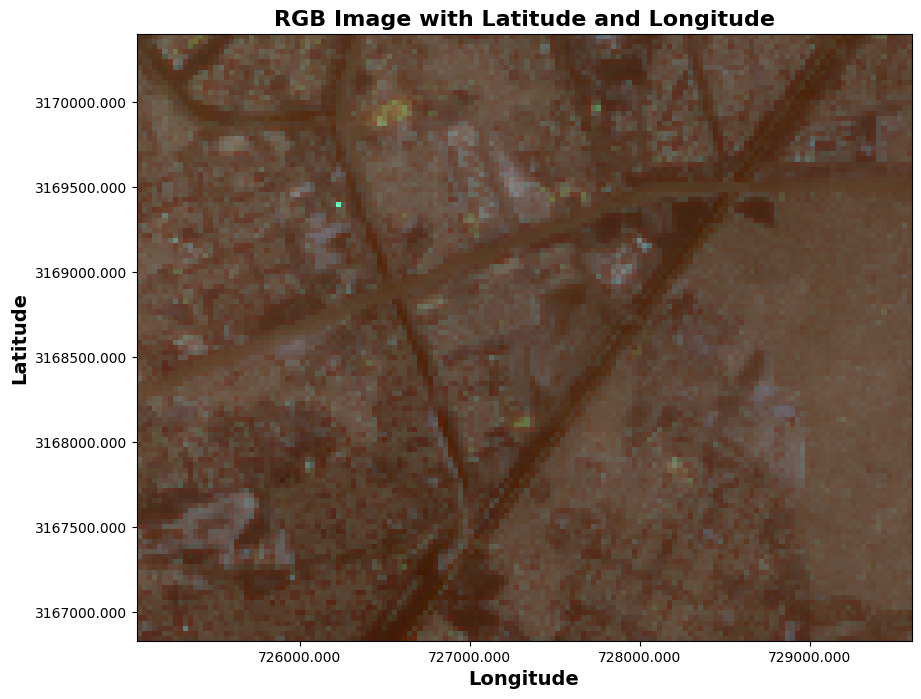

In [9]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from rasterio.transform import Affine
from matplotlib.colors import Normalize
from matplotlib.ticker import FuncFormatter

def plot_rgb_tiff_with_lat_lon(tif_path):
    # Open the TIFF file
    with rasterio.open(tif_path) as src:
        # Read the RGB bands (assuming they are stored in bands 1, 2, and 3)
        red = src.read(1)
        green = src.read(2)
        blue = src.read(3)
        
        # Stack the bands to create an RGB image
        rgb = np.stack([red, green, blue], axis=-1)

        # Normalize the RGB values to the range 0-1 for visualization
        rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min())

        # Get the transformation and metadata
        transform = src.transform
        bounds = src.bounds
        
        # Create a matplotlib figure and axis
        fig, ax = plt.subplots(figsize=(10, 10))
        
        # Plot the RGB image
        cax = ax.imshow(rgb, extent=[bounds.left, bounds.right, bounds.bottom, bounds.top])
        
        # Set labels and title
        ax.set_xlabel('Longitude', fontsize=14, fontweight='bold')
        ax.set_ylabel('Latitude', fontsize=14, fontweight='bold')
        ax.set_title('RGB Image with Latitude and Longitude', fontsize=16, fontweight='bold')

        # Define a formatter function for three decimal places
        def format_func(value, tick_number):
            return f'{value:.3f}'  # Display with 3 decimal places
        
        # Apply the formatter to both axes
        ax.xaxis.set_major_formatter(FuncFormatter(format_func))
        ax.yaxis.set_major_formatter(FuncFormatter(format_func))
        
        # Show the plot
        plt.show()

# Path to the RGB TIFF file
tif_path = '/Users/jayarajupakki/Downloads/SentinalGhazipur2024.tif'

# Plot the RGB TIFF file with latitude and longitude
plot_rgb_tiff_with_lat_lon(tif_path)


In [10]:
import rasterio

def check_tif_metadata(tif_path):
    with rasterio.open(tif_path) as src:
        # Print CRS (Coordinate Reference System)
        print("CRS:", src.crs)

        # Print geotransform (affine transformation)
        print("Transform:", src.transform)

        # Print bounds of the raster
        print("Bounds:", src.bounds)

# Path to the TIFF file
tif_path = '/Users/jayarajupakki/Downloads/SentinalGhazipur2024.tif'

# Check metadata
check_tif_metadata(tif_path)


CRS: EPSG:32643
Transform: | 30.00, 0.00, 725040.00|
| 0.00,-30.00, 3170400.00|
| 0.00, 0.00, 1.00|
Bounds: BoundingBox(left=725040.0, bottom=3166830.0, right=729600.0, top=3170400.0)


In [2]:
import rasterio

def check_tif_metadata(tif_path):
    with rasterio.open(tif_path) as src:
        # Print CRS (Coordinate Reference System)
        print("CRS:", src.crs)

        # Print geotransform (affine transformation)
        print("Transform:", src.transform)

        # Print bounds of the raster
        print("Bounds:", src.bounds)

# Path to the TIFF file
tif_path = '/Users/jayarajupakki/Downloads/Landsat2024_Delhi.tif'

# Check metadata
check_tif_metadata(tif_path)


CRS: EPSG:4326
Transform: | 0.00, 0.00, 77.32|
| 0.00,-0.00, 28.63|
| 0.00, 0.00, 1.00|
Bounds: BoundingBox(left=77.32096094460482, bottom=28.61870798453654, right=77.33632213596326, top=28.628409789605033)


In [ ]:
Bounds: BoundingBox(left=75.32096094460482, bottom=25.61870798453654, right=79.33632213596326, top=30.628409789605033)


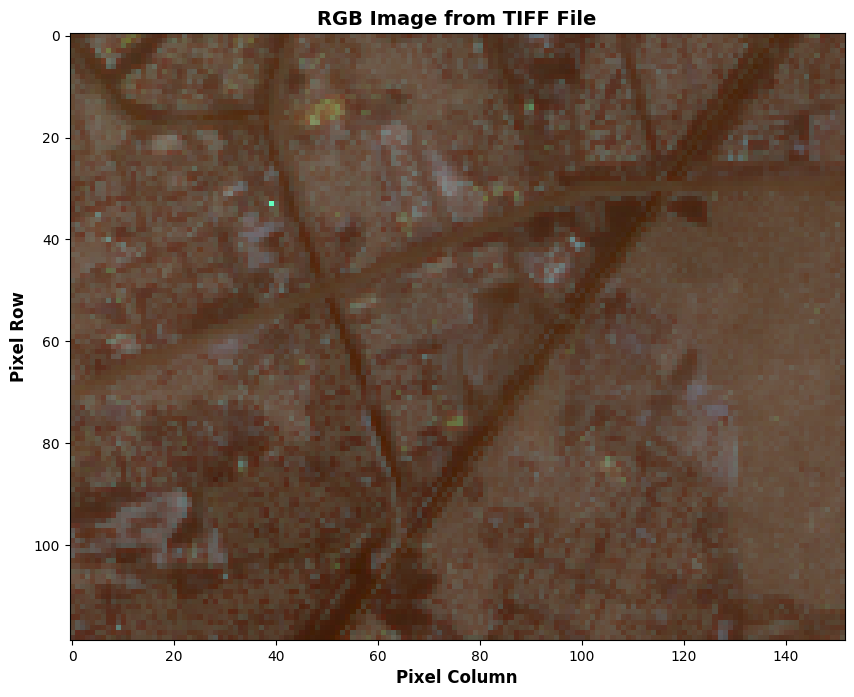

In [7]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

def plot_rgb_tiff(tif_path):
    # Open the TIFF file
    with rasterio.open(tif_path) as src:
        # Read the RGB bands (assuming they are stored in bands 1, 2, and 3)
        red = src.read(1)
        green = src.read(2)
        blue = src.read(3)
        
        # Stack the bands to create an RGB image
        rgb = np.stack([red, green, blue], axis=-1)

        # Normalize the RGB values to the range 0-1 for visualization
        rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min())

        # Create a matplotlib figure and axis
        fig, ax = plt.subplots(figsize=(10, 10))
        
        # Plot the RGB image
        ax.imshow(rgb)
        
        # Set labels and title
        ax.set_xlabel('Pixel Column', fontsize=12, fontweight='bold')
        ax.set_ylabel('Pixel Row', fontsize=12, fontweight='bold')
        ax.set_title('RGB Image from TIFF File', fontsize=14, fontweight='bold')
        
        # Show the plot
        plt.show()

# Path to the TIFF file
tif_path = '/Users/jayarajupakki/Downloads/SentinalGhazipur2024.tif'

# Plot the TIFF file
plot_rgb_tiff(tif_path)
